<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module5_Tutorial_GAMClassifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam

     |████████████████████████████████| 1.8 MB 5.1 MB/s 


In [9]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from pygam import LogisticGAM, LinearGAM, GAM, s, f, l

In [3]:
#!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 70 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [4]:
#Credit Card Defaults, again (used prepped data)
mydata = pd.read_csv('ML_656/UCI_Credit_Card_prepped.csv', index_col=0)

In [5]:
Train, Test = train_test_split(mydata, test_size=0.25)
Train_y = Train['default']
Train = Train.drop(columns = ['default'])
Test_y = Test['default']
Test = Test.drop(columns = ['default'])

In [10]:
#LINEAR MODEL AGAIN
logistic_model1 = LogisticRegression(fit_intercept=True, max_iter=500).fit(Train,Train_y)
logistic_pred_1 = logistic_model1.predict_proba(Test)
np.sum(logistic_pred_1[:,1] > 0.5)
np.sum(logistic_pred_1[:,1] > 0.38)
logistic_pred_1_lab = logistic_pred_1[:,1] > 0.36
confusion_matrix(Test_y, logistic_pred_1_lab)

array([[5545,  292],
       [1460,  203]])

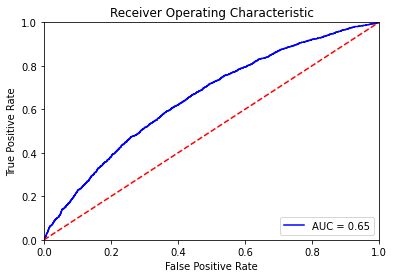

In [11]:
fpr, tpr, threshold = roc_curve(Test_y, logistic_pred_1[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

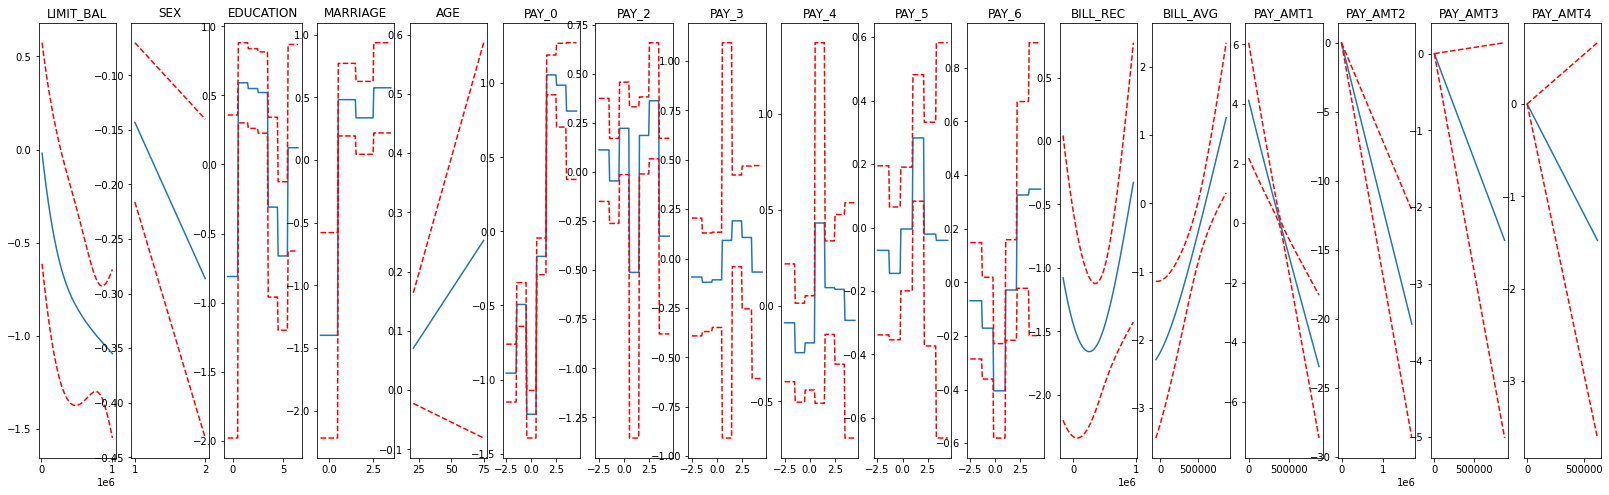

In [14]:
#GAM

gam = LogisticGAM(s(0,n_splines=5) + l(1) + f(2) + f(3) + l(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) + s(11, n_splines=5) + s(12, n_splines=5) + s(13, n_splines=5) + l(14) + l(15) + l(16)).fit(Train, Train_y)
XX = gam.generate_X_grid
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, 17)
titles = list(Train.columns)
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
plt.show()


In [17]:
gam_preds = gam.predict_proba(Test)
gam_pred_labels = np.zeros(len(Test_y))
gam_pred_labels[gam_preds >0.5] = 1
confusion_matrix(Test_y, gam_pred_labels)

array([[5567,  270],
       [1050,  613]])

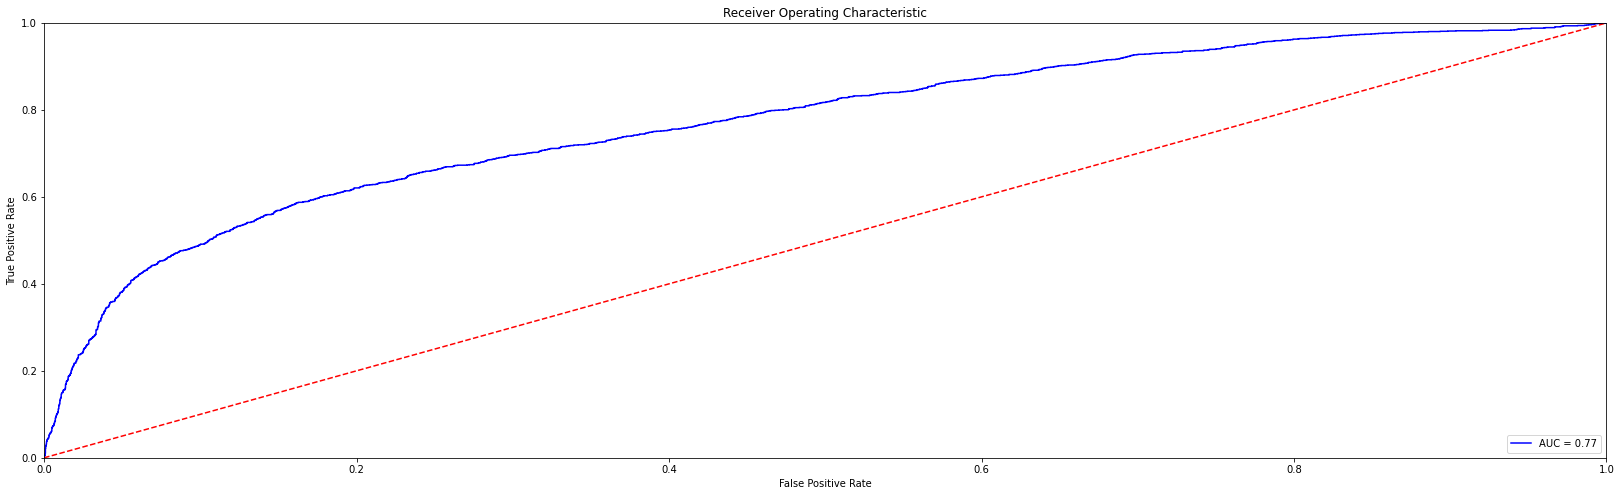

In [18]:
fpr, tpr, threshold = roc_curve(Test_y, gam_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()